(test-functions:otl-circuit)=
# OTL Circuit Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uqtestfuns as uqtf

The OTL circuit test function is a six-dimensional scalar-valued function.
The function has been used as a test function in metamodeling exercises
{cite}`BenAri2007` and sensitivity analysis {cite}`Moon2010`.
In {cite}`Moon2010`, a 20-dimensional variant was used for sensitivity analysis
by introducing 14 additional _inert_ input variables.

## Test function instance

To create a default instance of the OTL circuit test function:

In [2]:
my_testfun = uqtf.OTLCircuit()

Check if it has been correctly instantiated:

In [3]:
print(my_testfun)

Name              : OTLCircuit
Spatial dimension : 6
Description       : Output transformerless (OTL) circuit model from Ben-Ari and Steinberg (2007)


## Description

The OTL circuit function computes the mid-point voltage of an output
transformerless (OTL) push-pull circuit using the following analytical formula:

$$
\begin{align}
	\mathcal{M}(\boldsymbol{x}) & = \frac{(V_{b1} + 0.74) \beta (R_{c2} + 9)}{\beta (R_{c2} + 9) + R_f} + \frac{11.35 R_f}{\beta (R_{c2} + 9) + R_f} + \frac{0.74 R_f \beta (R_{c2} + 9)}{(\beta (R_{c2} + 9) + R_f) R_{c1}}, \\
	V_{b1} & = \frac{12 R_{b2}}{R_{b1} + R_{b2}}, \\
\end{align}
$$

where $\boldsymbol{x} = \{ R_{b1}, R_{b2}, R_f, R_{c1}, R_{c2}, \beta \}$ is
the six-dimensional vector of input variables further defined below.

## Probabilistic input

Two probabilistic input model specifications for the OTL circuit function
are available as shown in the table below.

|  No.   |         Keyword         |       Source       |  
|:------:|:-----------------------:|:------------------:|  
|   1.   | `BenAri2007` (default)  | {cite}`BenAri2007` |  
|   2.   |       `Moon2010`        |  {cite}`Moon2010`  |

The default selection, based on {cite}`BenAri2007`,
contains six input variables given as independent uniform random variables
with specified ranges shown in the table below.

In [4]:
my_testfun.prob_input

ProbInput(spatial_dimension=6, marginals=(UnivDist(distribution='uniform', parameters=array([ 50., 150.]), name='Rb1', description='Resistance b1 [kOhm]'), UnivDist(distribution='uniform', parameters=array([25., 70.]), name='Rb2', description='Resistance b2 [kOhm]'), UnivDist(distribution='uniform', parameters=array([0.5, 3. ]), name='Rf', description='Resistance f [kOhm]'), UnivDist(distribution='uniform', parameters=array([1.2, 2.5]), name='Rc1', description='Resistance c1 [kOhm]'), UnivDist(distribution='uniform', parameters=array([0.25, 1.2 ]), name='Rc2', description='Resistance c2 [kOhm]'), UnivDist(distribution='uniform', parameters=array([ 50., 300.]), name='beta', description='Current gain [A]')), copulas=None, name='OTLCircuit-BenAri2007', description='Probabilistic input model for the OTL Circuit function from Ben-Ari and Steinberg (2007).')

````{note}
In {cite}`Moon2010`,
14 additional _inert_ independent input variables are introduced (totaling 20
input variables);
these input variables, being inert, do not affect the output of the function.

To create an instance of the OTL circuit test function with the probabilistic
input specified in {cite}`Moon2010`, pass the corresponding keyword
(`"Moon2010"`) to the parameter (`prob_input_selection`):

```python
my_testfun = uqtf.OTLCircuit(prob_input_selection="Moon2010")
```
````

## Reference results

This section provides several reference results of typical UQ analyses involving
the test function.

### Sample histogram

Shown below is the histogram of the output based on $100'000$ random points:

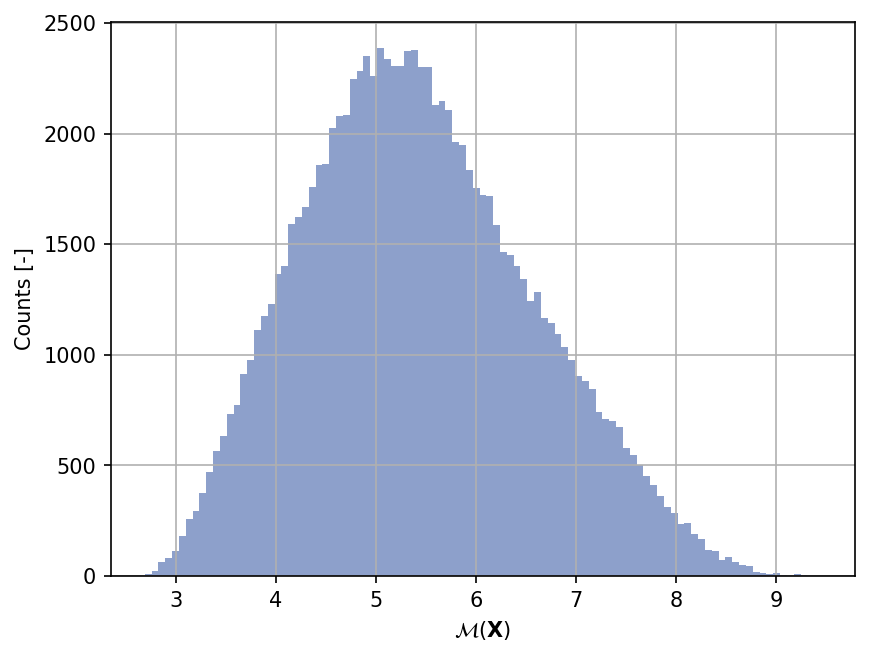

In [5]:
np.random.seed(42)
xx_test = my_testfun.prob_input.get_sample(100000)
yy_test = my_testfun(xx_test)

plt.hist(yy_test, bins="auto", color="#8da0cb");
plt.grid();
plt.ylabel("Counts [-]");
plt.xlabel("$\mathcal{M}(\mathbf{X})$");
plt.gcf().set_dpi(150);

### Moments estimation

Shown below is the convergence of a direct Monte-Carlo estimation of
the output mean and variance with increasing sample sizes.

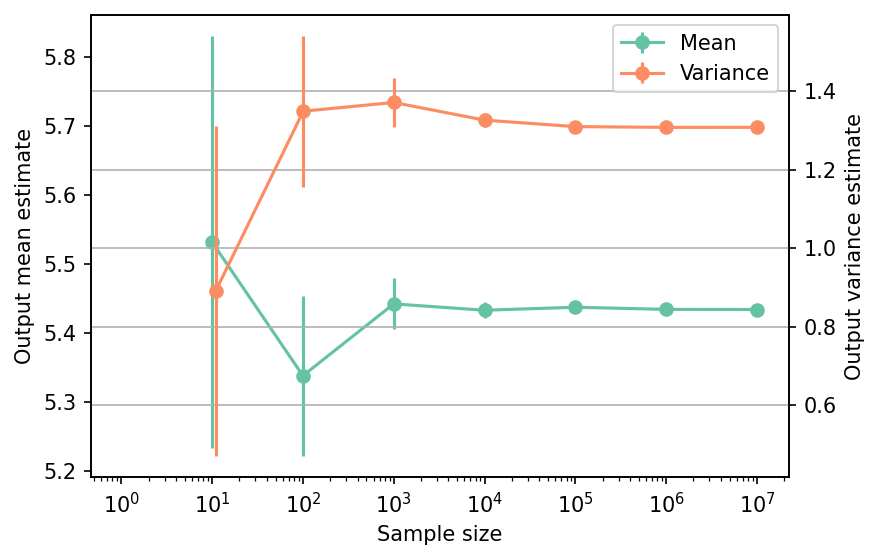

In [6]:
# --- Compute the mean and variance estimate
np.random.seed(42)
sample_sizes = np.array([1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7], dtype=int)
mean_estimates = np.empty(len(sample_sizes))
var_estimates = np.empty(len(sample_sizes))

for i, sample_size in enumerate(sample_sizes):
    xx_test = my_testfun.prob_input.get_sample(sample_size)
    yy_test = my_testfun(xx_test)
    mean_estimates[i] = np.mean(yy_test)
    var_estimates[i] = np.var(yy_test)

# --- Compute the error associated with the estimates
mean_estimates_errors = np.sqrt(var_estimates) / np.sqrt(np.array(sample_sizes))
var_estimates_errors = var_estimates * np.sqrt(2 / (np.array(sample_sizes) - 1))

# --- Do the plot
fig, ax_1 = plt.subplots(figsize=(6,4))

ax_1.errorbar(
    sample_sizes,
    mean_estimates,
    yerr=mean_estimates_errors,
    marker="o",
    color="#66c2a5",
    label="Mean",
)
ax_1.set_xlabel("Sample size")
ax_1.set_ylabel("Output mean estimate")
ax_1.set_xscale("log");
ax_2 = ax_1.twinx()
ax_2.errorbar(
    sample_sizes + 1,
    var_estimates,
    yerr=var_estimates_errors,
    marker="o",
    color="#fc8d62",
    label="Variance",
)
ax_2.set_ylabel("Output variance estimate")

# Add the two plots together to have a common legend
ln_1, labels_1 = ax_1.get_legend_handles_labels()
ln_2, labels_2 = ax_2.get_legend_handles_labels()
ax_2.legend(ln_1 + ln_2, labels_1 + labels_2, loc=0)

plt.grid()
fig.set_dpi(150)

The tabulated results for is shown below.

In [7]:
from tabulate import tabulate

# --- Compile data row-wise
outputs = []
for (
    sample_size,
    mean_estimate,
    mean_estimate_error,
    var_estimate,
    var_estimate_error,
) in zip(
    sample_sizes,
    mean_estimates,
    mean_estimates_errors,
    var_estimates,
    var_estimates_errors,
):
    outputs += [
        [
            sample_size,
            mean_estimate,
            mean_estimate_error,
            var_estimate,
            var_estimate_error,
            "Monte-Carlo",
        ],
    ]

header_names = [
    "Sample size",
    "Mean",
    "Mean error",
    "Variance",
    "Variance error",
    "Remark",
]

tabulate(
    outputs,
    headers=header_names,
    floatfmt=(".1e", ".4f", ".4e", ".4f", ".4e", "s"),
    tablefmt="html",
    stralign="center",
    numalign="center",
)

'<table>\n<thead>\n<tr><th style="text-align: center;"> Sample size </th><th style="text-align: center;"> Mean </th><th style="text-align: center;"> Mean error </th><th style="text-align: center;"> Variance </th><th style="text-align: center;"> Variance error </th><th style="text-align: center;">  Remark   </th></tr>\n</thead>\n<tbody>\n<tr><td style="text-align: center;">   1.0e+01   </td><td style="text-align: center;">5.5320</td><td style="text-align: center;"> 2.9861e-01 </td><td style="text-align: center;">  0.8917  </td><td style="text-align: center;">   4.2035e-01   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+02   </td><td style="text-align: center;">5.3385</td><td style="text-align: center;"> 1.1612e-01 </td><td style="text-align: center;">  1.3485  </td><td style="text-align: center;">   1.9166e-01   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+03   </td><td style="text-align: center;">5.4424</td><td style="text-align: center;"> 3.7023e-02 </td><td style="text-align: center;">  1.3707  </td><td style="text-align: center;">   6.1330e-02   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+04   </td><td style="text-align: center;">5.4333</td><td style="text-align: center;"> 1.1514e-02 </td><td style="text-align: center;">  1.3258  </td><td style="text-align: center;">   1.8750e-02   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+05   </td><td style="text-align: center;">5.4376</td><td style="text-align: center;"> 3.6184e-03 </td><td style="text-align: center;">  1.3093  </td><td style="text-align: center;">   5.8553e-03   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+06   </td><td style="text-align: center;">5.4345</td><td style="text-align: center;"> 1.1434e-03 </td><td style="text-align: center;">  1.3073  </td><td style="text-align: center;">   1.8488e-03   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+07   </td><td style="text-align: center;">5.4343</td><td style="text-align: center;"> 3.6159e-04 </td><td style="text-align: center;">  1.3075  </td><td style="text-align: center;">   5.8471e-04   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n</tbody>\n</table>'

## References

```{bibliography}
:style: unsrtalpha
:filter: docname in docnames
```